In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('real_qpu_data.csv')
data

,pkid,pbid,layers,method,backend,shots,ARG,in_constraints_probs,best_solution_probs,iteration_count
0,0,0,7,penalty,ibm_fez,1024,57.374935,10.156250,3.027344,141
1,0,0,7,cyclic,ibm_fez,1024,54.539714,9.375000,1.757812,149
2,0,0,1,commute,ibm_fez,1024,24.850391,48.339844,5.078125,33
3,0,0,7,HEA,ibm_fez,1024,60.128125,9.667969,3.613281,151
4,1,0,7,penalty,ibm_fez,1024,1255.407227,0.488281,0.488281,149
5,1,0,7,cyclic,ibm_fez,1024,951.146484,0.878906,0.585938,147
6,1,0,1,commute,ibm_fez,1024,854.262207,3.027344,0.976562,33
7,1,0,7,HEA,ibm_fez,1024,1165.734863,0.488281,0.292969,151
8,2,0,7,penalty,ibm_fez,1024,73.984996,2.636719,0.683594,136
9,2,0,7,cyclic,ibm_fez,1024,71.115146,2.539062,0.488281,144


In [4]:
# data.strategy = data.strategy.apply(lambda x: '1' if x else 'qiskit')

In [5]:
data = data[['method', 'iteration_count']]
data = data.groupby('method').mean().reset_index()
order = ['penalty', 'cyclic', 'HEA', 'commute']

# 将 'method' 列转换为分类类型，并设置排序顺序
data['method'] = pd.Categorical(data['method'], categories=order, ordered=True)
data = data.sort_values(by='method')

data

,method,iteration_count
3,penalty,143.000000
2,cyclic,142.333333
0,HEA,151.000000
1,commute,29.666667


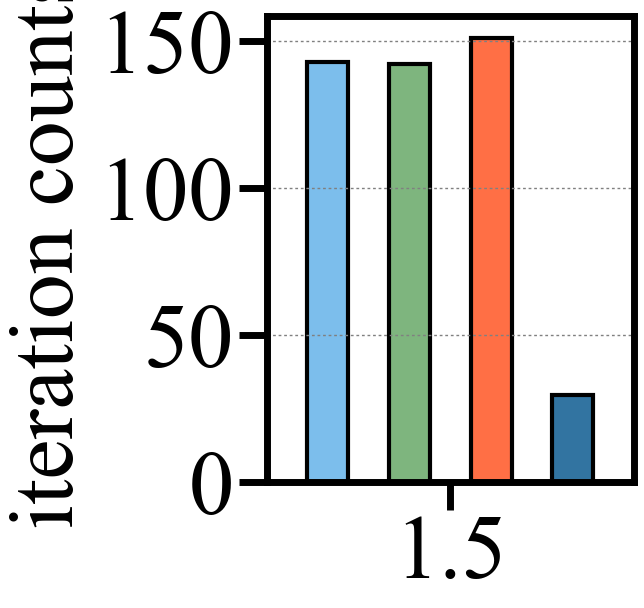

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
scale = 1.05
fig= plt.figure(figsize=(25*scale, 12*scale))
mpl.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'Times New Roman',
    'font.size': 65,
    'axes.unicode_minus': False,
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic',
    'mathtext.bf': 'Times New Roman:bold',
    'axes.linewidth': 5,
    'xtick.major.size': 20,
    'xtick.major.width': 5,
    'ytick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.major.size': 20,
    'ytick.major.width': 5,
    "markers.fillstyle" :  'left' , ## default
    "lines.markersize" : 30,
    "lines.markeredgewidth" : 3,
    # 'lines.markeredgecolor': 'black',
})
bar_width = 0.5
shrink = 0

colors = ["#7CBEEC", "#7EB57E", "#FF6F45", "#3274A1"]
# for i, metric in enumerate( ["culled_depth",'rss_usage']):
i = 0
axes = plt.axes([0, 0, 0.14, 0.37])
ylabel = 'iteration_counts'

indexs = [i for i in np.arange(0, len(data.index.values))]
for i in range(0, len(indexs) - 1, 3):
    indexs[i] += shrink
    indexs[i + 2] -= shrink

axes.bar([index for index in indexs], data['iteration_count'], linewidth=3, edgecolor='black', width=bar_width, color=colors)

index = indexs
axes.set_xticks([1.5], minor=False)
# axes.set_xticklabels
axes.set_yticks(range(0, 200, 50), minor=False)
axes.set_ylabel(r"iteration counts")
axes.grid(axis="y", color="gray", linestyle="--", linewidth=1, dashes=(2, 2))
# axes.set_yscale("log")
# axes.set_xticklabels(order, minor=False)
axes.set_xlim(0 - 1.5 * bar_width, 3 + 1.5 * bar_width)
# axes.legend(frameon=False, bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=2, prop={'size': 60})
plt.savefig("iteration.svg", bbox_inches="tight")